In [3]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


# Create dataset

In [6]:
import os
path="D:/SHIKHA/MSc AI/2nd Sem/Machine Learning/ML Project 2/DevanagariHandwrittenCharacterDataset/Data/"
files=os.listdir(path)
print(files)

['01_ka', '02_kha', '03_ga', '04_gha', '05_kna', '06_cha', '07_chha', '08_ja', '09_jha', '10_yna']


In [7]:
import cv2

x= []
y= []
for cl in classes:
    pth = path+cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth +"/"+img_name,0)
        x.append(img)
        y.append(classes[cl])
print('data created successfully!')


data created successfully!


In [8]:
pd.Series(y).value_counts()

0    300
1    300
2    300
3    300
4    300
5    300
6    300
7    300
8    300
9    300
dtype: int64

In [9]:
x[0].shape

(32, 32)

In [10]:
print(type(x))
x = np.array(x)
y = np.array(y)
print(type(x))

<class 'list'>
<class 'numpy.ndarray'>


# Analyze data

2


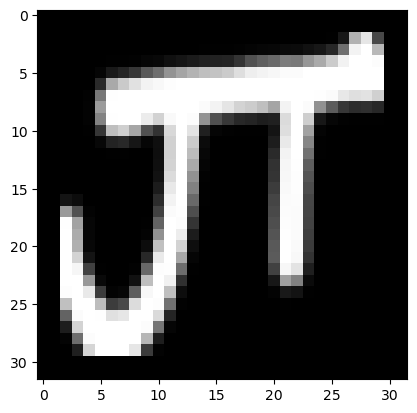

In [11]:
plt.imshow(x[700],cmap="gray")
print(y[700])

In [12]:
x.shape

(3000, 32, 32)

# prepare data

In [13]:
x_new = x.reshape(len(x),-1)
print(x_new.shape)
print(y.shape)

(3000, 1024)
(3000,)


In [14]:
print(x.shape)
print(x.ndim)
print(x_new.ndim)

(3000, 32, 32)
3
2


# Split Data

In [15]:
x_train , x_test, y_train, y_test  = train_test_split(x_new,y,test_size=.20,random_state=1)

In [16]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)


(2400, 1024) (2400,)
(600, 1024) (600,)


# Feature scaling

In [17]:
print(x_train.max())
print(x_test.max())
xtrain = x_train/255
xtest = x_test/255
print(xtrain.max())
print(xtest.max())

255
255
1.0
1.0


# Feature Selection:PCA

In [18]:
from sklearn.decomposition import PCA

In [19]:
print(xtrain.shape , xtest.shape)
pca= PCA(.98)
x_train= pca.fit_transform(xtrain)
x_test= pca.transform(xtest)
print(x_train.shape,x_test.shape)
print(pca.n_components)
print(pca.n_features_)

(2400, 1024) (600, 1024)
(2400, 274) (600, 274)
0.98
1024


In [20]:
y_test[:10]

array([6, 6, 4, 5, 3, 1, 0, 0, 1, 6])

In [21]:
from sklearn.manifold import TSNE
t_sne = TSNE(n_components=3, learning_rate='auto',init='random')
x_embedded=t_sne.fit_transform(x_new)
x_embedded.shape

(3000, 3)

# Train Model

In [27]:
model1=MLPClassifier(hidden_layer_sizes=(30, 15), max_iter=30,activation='relu',alpha=0.01)
model1.fit(x_train,y_train)

C:\Users\shikh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, hidden_layer_sizes=(30, 15), max_iter=30)

In [28]:
x_train_prediction=model1.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
training_data_accuracy

0.9791666666666666

In [29]:
x_test_prediction=model1.predict(x_test)
training_data_accuracy=accuracy_score(x_test_prediction,y_test)
training_data_accuracy

0.8066666666666666


# Prediction

In [30]:
model2=SVC()
model2.fit(x_train,y_train)

SVC()

In [31]:
x_train_prediction=model2.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
training_data_accuracy

0.9941666666666666

In [32]:
x_test_prediction=model2.predict(x_test)
training_data_accuracy=accuracy_score(x_test_prediction,y_test)
training_data_accuracy

0.9133333333333333

# Evaluation

6


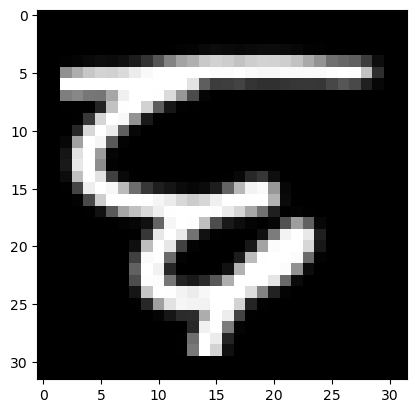

In [33]:
plt.imshow(xtest[0].reshape(32,32), cmap="gray")
print(y_test[0])

# Test Model

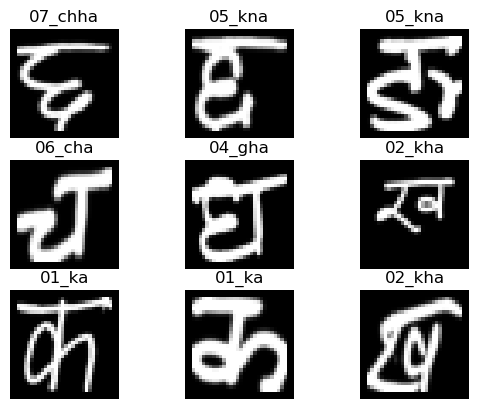

In [35]:
decode = {0:"01_ka",1:"02_kha",2:"03_ga",3:"04_gha",4:"05_kna",5:"06_cha",6:"07_chha",7:"08_ja",8:"09_jha",9:"10_yna"}
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(xtest[i].reshape(32,32),cmap='gray')
    plt.title(decode[x_test_prediction[i]])
    plt.axis('off')


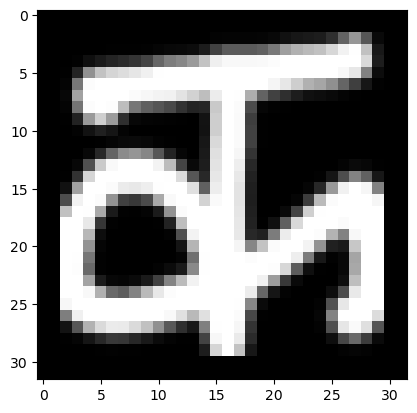

In [38]:
img = cv2.resize(cv2.imread("D:/SHIKHA/MSc AI/2nd Sem/Machine Learning/ML Project 2/DevanagariHandwrittenCharacterDataset/Test/1_ka/8084.png",0),(32,32))
plt.imshow(img, cmap='gray')

In [39]:
img = pca.transform(img.reshape(1,-1)/255)

In [40]:
decode[model2.predict(img)[0]]

'01_ka'